Primeiras linhas do dataset:
    Categoria            SubCategoria        Modelo       Cor Tamanho  \
0  Bicicletas  Bicicletas de montanha  Mountain-100     Prata      48   
1  Bicicletas   Bicicletas de estrada      Road-150  Vermelho      62   
2  Bicicletas   Bicicletas de estrada      Road-150  Vermelho      52   
3  Bicicletas  Bicicletas de montanha  Mountain-100     Preto      38   
4  Bicicletas   Bicicletas de estrada      Road-150  Vermelho      48   

   Preço Custo Unit Data Pedido    Pais               Estado  UF  \
0         1912.1544  2017-07-01  Brasil              Paraíba  PB   
1         2171.2942  2017-07-01  Brasil         Minas Gerais  MG   
2         2171.2942  2017-07-01  Brasil              Alagoas  AL   
3         1898.0944  2017-07-01  Brasil                Ceará  CE   
4         2171.2942  2017-08-01  Brasil  Rio Grande do Norte  RN   

          Cidade    Região  Pedidos Qtd  Total Venda  
0       Passagem  Nordeste            2      6799.98  
1  Córrego Fu

c:\Users\Admin\Documents\T2\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Admin\Documents\T2\.venv\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


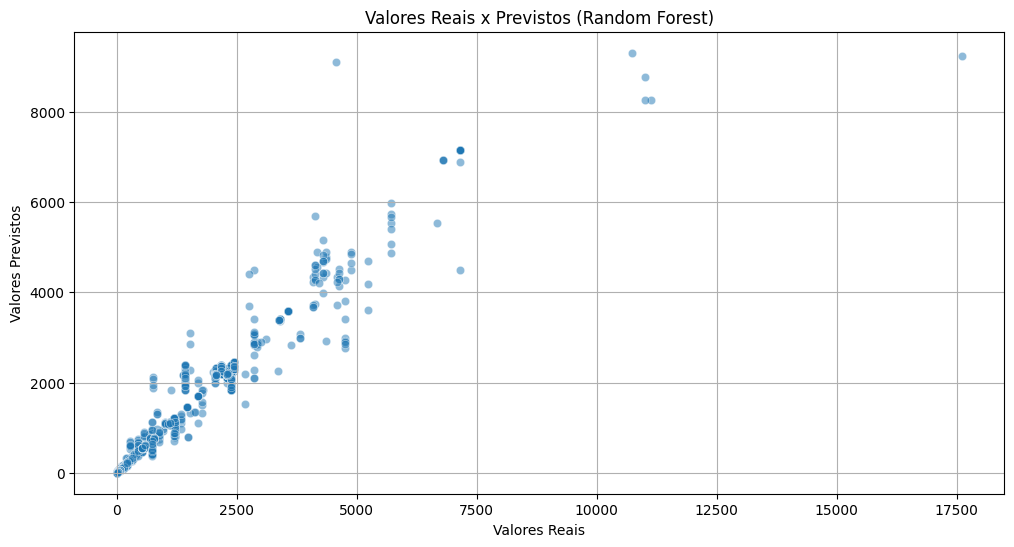

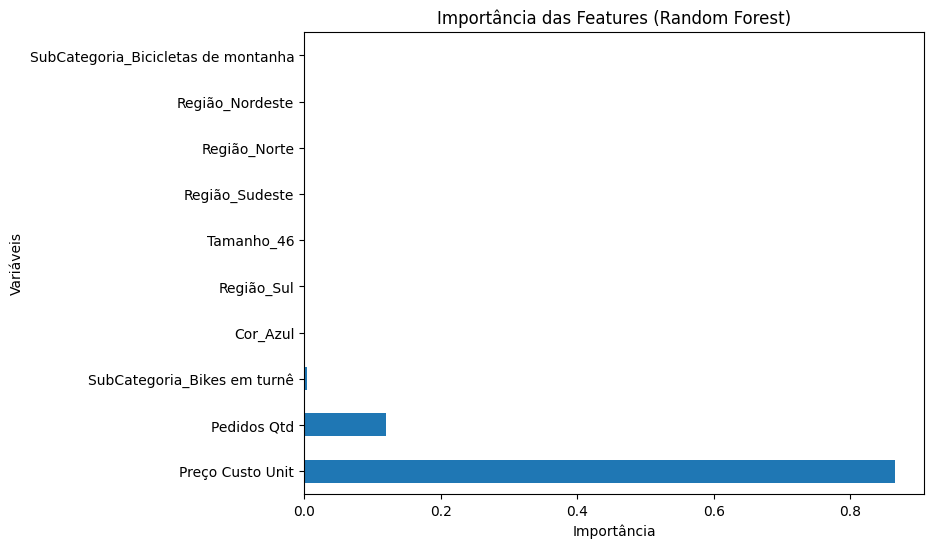

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Carregar os dados
file_path = 'TABELA_VENDAS.xlsx'
dados = pd.read_excel(file_path, sheet_name='Dados')

### 2. Pré-visualização
print("Primeiras linhas do dataset:")
print(dados.head())
print("\nResumo dos dados:")
print(dados.info())

### 3. Tratar valores ausentes
### Imputação: Preencher valores ausentes com "Desconhecido" para categóricas e moda para numéricas
dados['Cor'] = dados['Cor'].fillna('Desconhecido')
dados['Tamanho'] = dados['Tamanho'].fillna('Desconhecido')

### 4. Transformar variáveis categóricas em numéricas (One-Hot Encoding)
dados_encoded = pd.get_dummies(dados, columns=['Categoria', 'SubCategoria', 'Cor', 'Tamanho', 'Região'], drop_first=True)

### 5. Divisão em variáveis explicativas e alvo
X = dados_encoded.drop(columns=['Total Venda', 'Modelo', 'Data Pedido', 'Pais', 'Estado', 'UF', 'Cidade'])
y = dados_encoded['Total Venda']

### Dividir dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 6. Treinamento do modelo
### Usando Regressão Linear
modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)

### Usando Random Forest Regressor
modelo_rf = RandomForestRegressor(n_estimators=100, random_state=42)
modelo_rf.fit(X_train, y_train)

### 7. Avaliação do modelo
### Predições
y_pred_linear = modelo_linear.predict(X_test)
y_pred_rf = modelo_rf.predict(X_test)

### Cálculo das métricas
def avaliar_modelo(y_true, y_pred, modelo_nome):
    print(f"\nDesempenho do {modelo_nome}:")
    print(f"R²: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {mean_squared_error(y_true, y_pred, squared=False):.4f}")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.4f}")

avaliar_modelo(y_test, y_pred_linear, "Regressão Linear")
avaliar_modelo(y_test, y_pred_rf, "Random Forest")

### 8. Visualização dos Resultados
### Comparação entre valores reais e previstos
plt.figure(figsize=(12, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.5)
plt.title('Valores Reais x Previstos (Random Forest)')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.grid(True)
plt.show()

### Importância das features (apenas para Random Forest)
importancias = pd.Series(modelo_rf.feature_importances_, index=X.columns)
importancias.nlargest(10).plot(kind='barh', figsize=(8, 6))
plt.title('Importância das Features (Random Forest)')
plt.xlabel('Importância')
plt.ylabel('Variáveis')
plt.show()


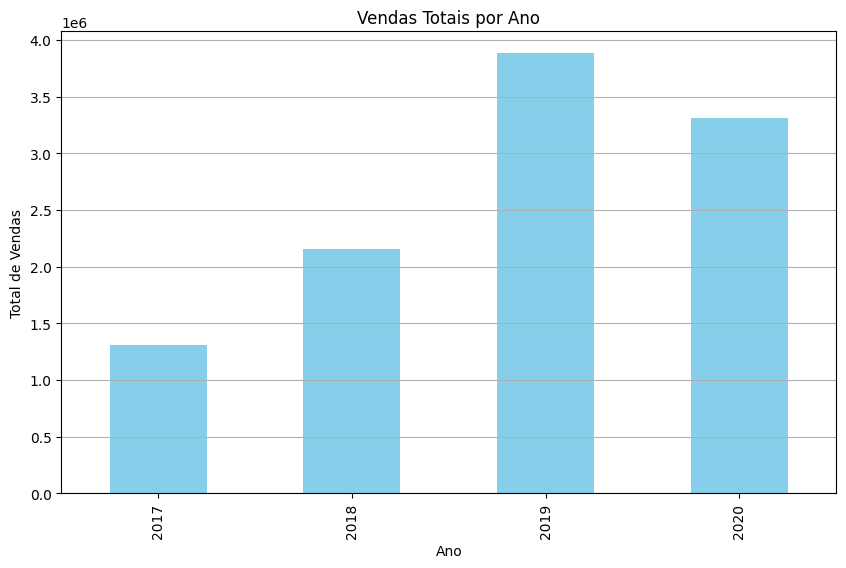

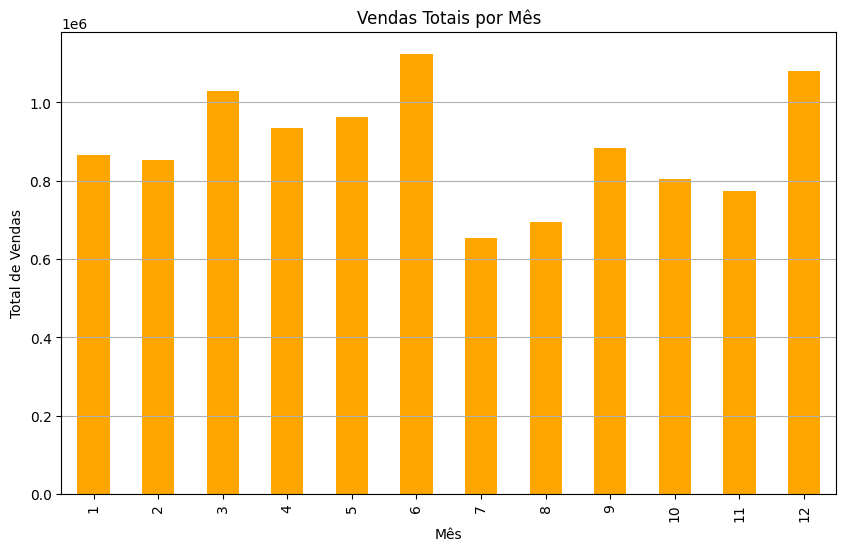

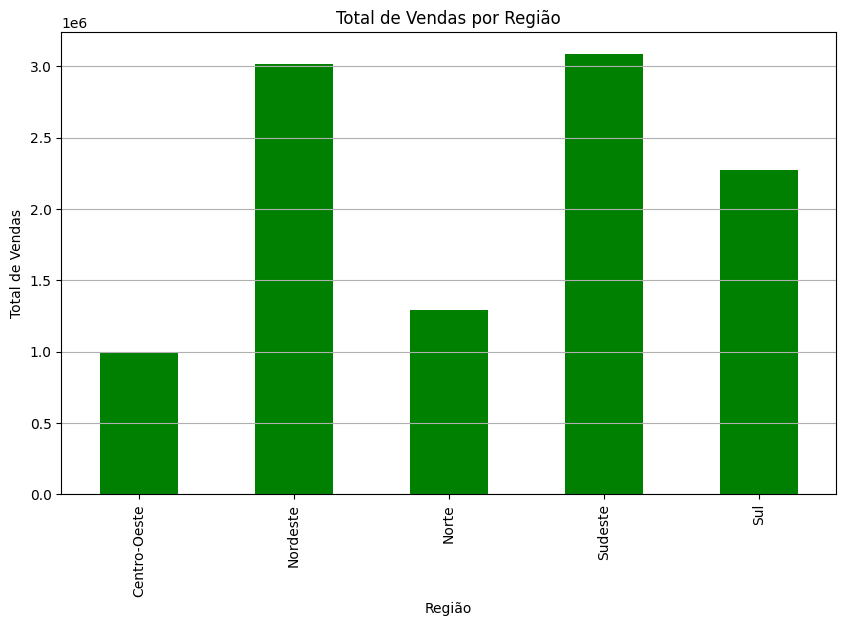

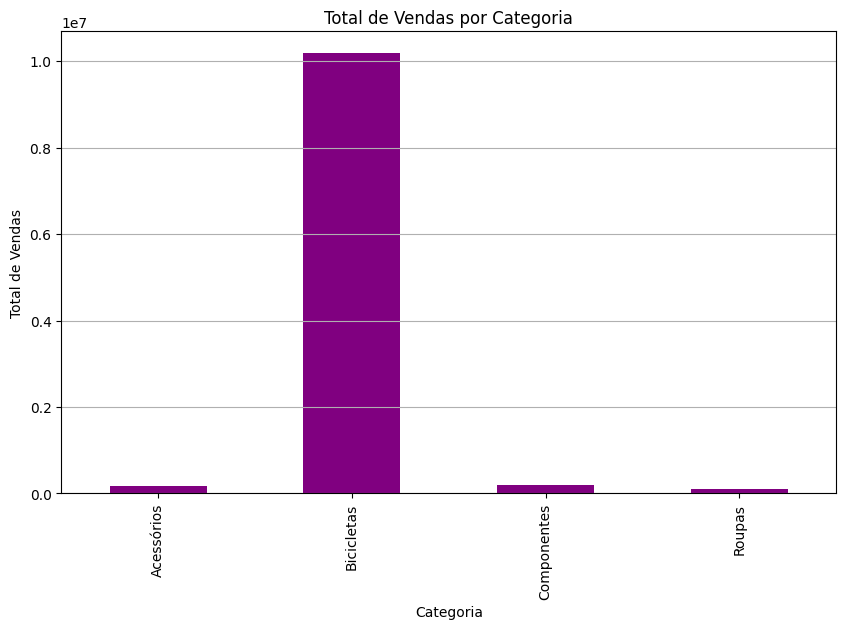

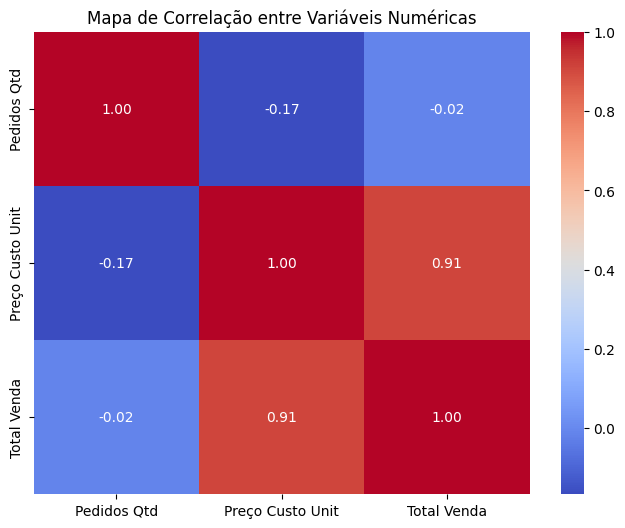

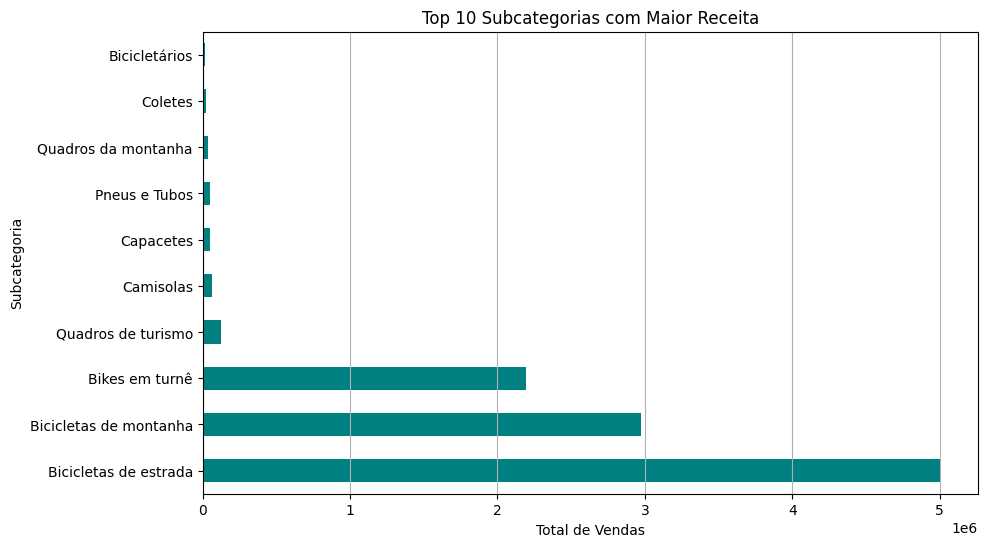

In [ ]:
### 1. Análise Temporal
### Converter "Data Pedido" para datetime, caso não esteja no formato
dados['Data Pedido'] = pd.to_datetime(dados['Data Pedido'])

### Criar colunas adicionais
dados['Ano'] = dados['Data Pedido'].dt.year
dados['Mes'] = dados['Data Pedido'].dt.month

### Analisar vendas totais por ano e mês
vendas_ano = dados.groupby('Ano')['Total Venda'].sum()
vendas_mes = dados.groupby('Mes')['Total Venda'].sum()

### Gráficos temporais
plt.figure(figsize=(10, 6))
vendas_ano.plot(kind='bar', color='skyblue')
plt.title('Vendas Totais por Ano')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
vendas_mes.plot(kind='bar', color='orange')
plt.title('Vendas Totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.grid(axis='y')
plt.show()

### 2. Análise por Região e Categoria
vendas_regiao = dados.groupby('Região')['Total Venda'].sum()
vendas_categoria = dados.groupby('Categoria')['Total Venda'].sum()

### Gráficos
plt.figure(figsize=(10, 6))
vendas_regiao.plot(kind='bar', color='green')
plt.title('Total de Vendas por Região')
plt.xlabel('Região')
plt.ylabel('Total de Vendas')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
vendas_categoria.plot(kind='bar', color='purple')
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Total de Vendas')
plt.grid(axis='y')
plt.show()

### 3. Correlação entre Variáveis Numéricas
### Criar um heatmap de correlação
correlacao = dados[['Pedidos Qtd', 'Preço Custo Unit', 'Total Venda']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

### 4. Análise de Contribuição
### Determinar top categorias e subcategorias
top_categorias = dados.groupby('Categoria')['Total Venda'].sum().sort_values(ascending=False)
top_subcategorias = dados.groupby('SubCategoria')['Total Venda'].sum().sort_values(ascending=False).head(10)

### Gráfico das principais subcategorias
plt.figure(figsize=(10, 6))
top_subcategorias.plot(kind='barh', color='teal')
plt.title('Top 10 Subcategorias com Maior Receita')
plt.xlabel('Total de Vendas')
plt.ylabel('Subcategoria')
plt.grid(axis='x')
plt.show()


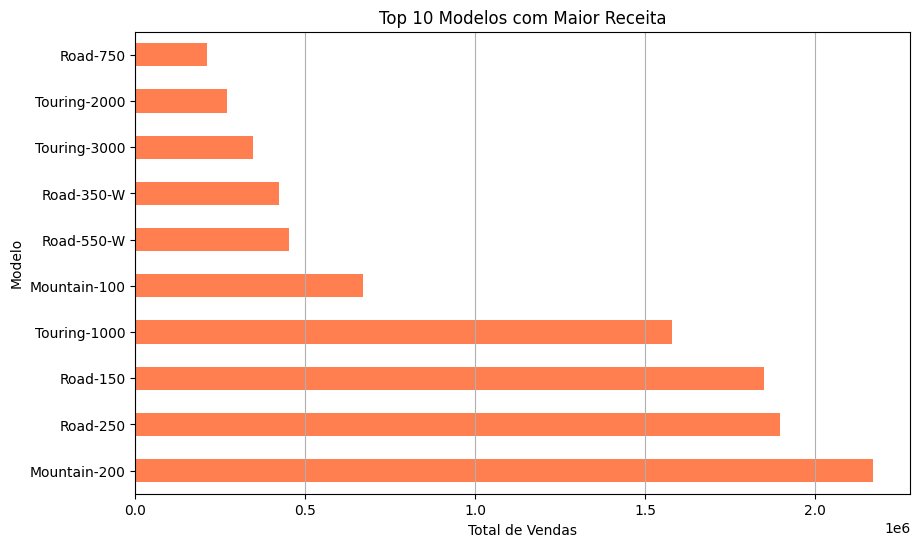

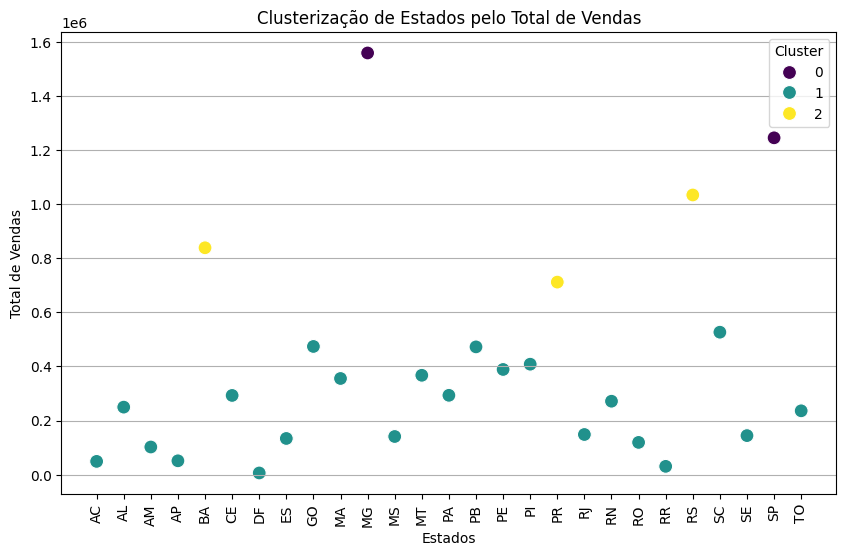

C:\Users\Admin\AppData\Local\Temp\ipykernel_2208\2084283821.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Categoria', y='Total Venda', data=dados, palette='Set3')


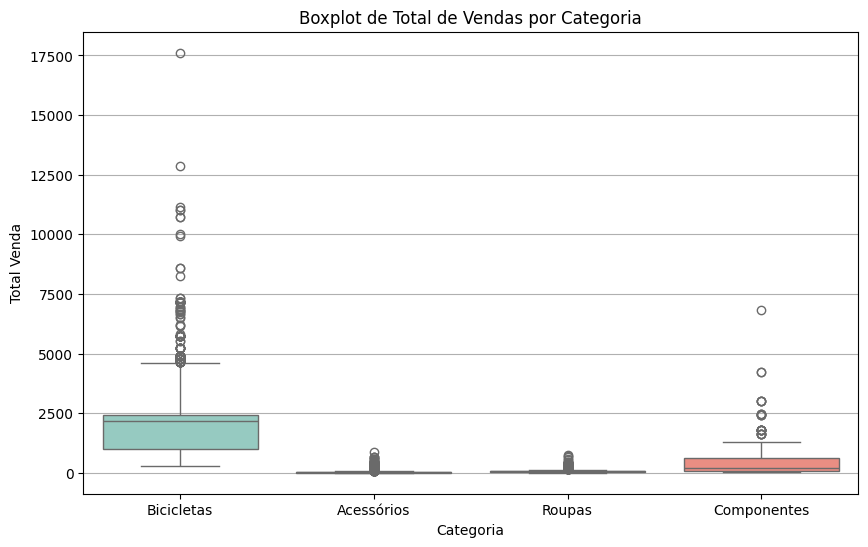

Total de Outliers Encontrados: 145


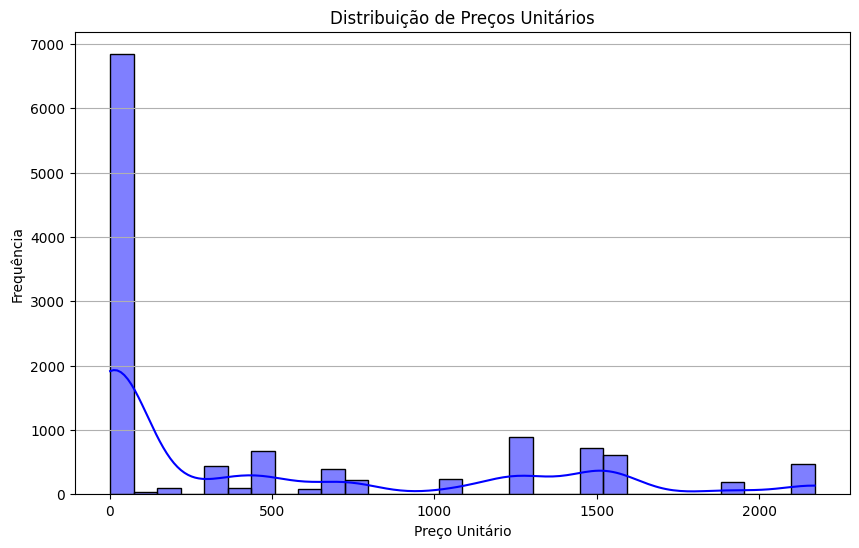

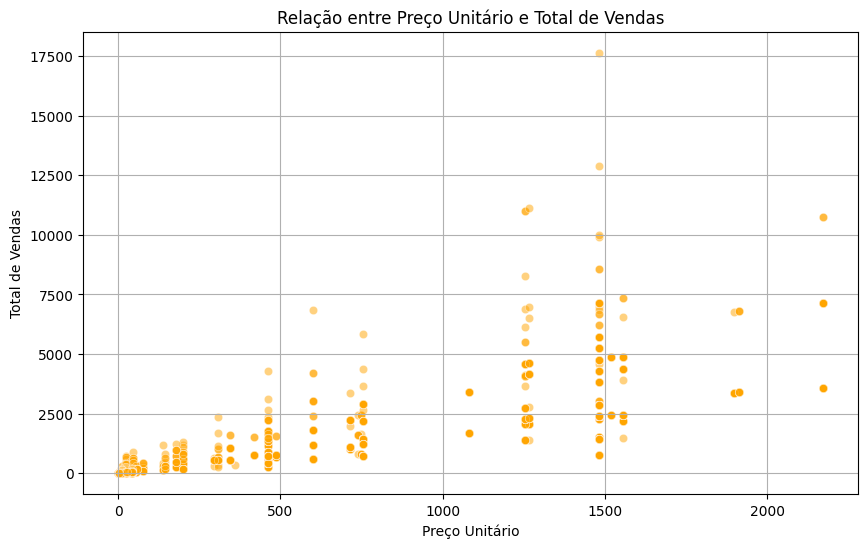

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np

### 1. Análise de Desempenho por Produto (Modelo)
desempenho_modelo = dados.groupby('Modelo')['Total Venda'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
desempenho_modelo.plot(kind='barh', color='coral')
plt.title('Top 10 Modelos com Maior Receita')
plt.xlabel('Total de Vendas')
plt.ylabel('Modelo')
plt.grid(axis='x')
plt.show()

### 2. Clusterização de Estados/Regiões com Base no Desempenho
### Preparar dados para clusterização
cluster_data = dados.groupby('UF')['Total Venda'].sum().reset_index()
scaler = StandardScaler()
cluster_data_scaled = scaler.fit_transform(cluster_data[['Total Venda']])

### Aplicar K-means
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_data['Cluster'] = kmeans.fit_predict(cluster_data_scaled)

### Visualizar clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UF', y='Total Venda', hue='Cluster', data=cluster_data, palette='viridis', s=100)
plt.title('Clusterização de Estados pelo Total de Vendas')
plt.xlabel('Estados')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.legend(title='Cluster')
plt.show()

### 3. Identificação de Outliers nas Vendas
### Usando o método de Z-score
dados['Z_score'] = (dados['Total Venda'] - dados['Total Venda'].mean()) / dados['Total Venda'].std()
outliers = dados[dados['Z_score'].abs() > 3]

### Visualizar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria', y='Total Venda', data=dados, palette='Set3')
plt.title('Boxplot de Total de Vendas por Categoria')
plt.grid(axis='y')
plt.show()

print(f"Total de Outliers Encontrados: {outliers.shape[0]}")

### 4. Distribuição de Preços
plt.figure(figsize=(10, 6))
sns.histplot(dados['Preço Custo Unit'], bins=30, kde=True, color='blue')
plt.title('Distribuição de Preços Unitários')
plt.xlabel('Preço Unitário')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()

### Análise da relação entre preço e vendas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Preço Custo Unit', y='Total Venda', data=dados, alpha=0.5, color='orange')
plt.title('Relação entre Preço Unitário e Total de Vendas')
plt.xlabel('Preço Unitário')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.show()


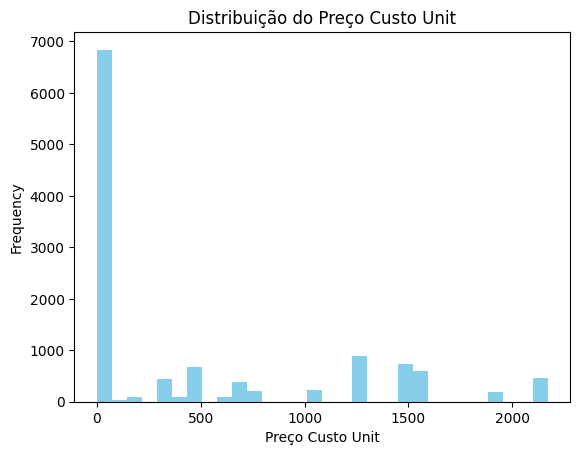

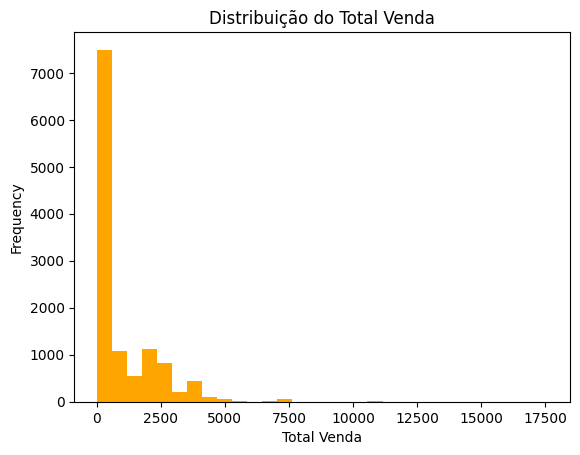

In [ ]:
import matplotlib.pyplot as plt

### Histograma para 'Preço Custo Unit'
dados['Preço Custo Unit'].plot(kind='hist', bins=30, title='Distribuição do Preço Custo Unit', color='skyblue')
plt.xlabel('Preço Custo Unit')
plt.show()

### Histograma para 'Total Venda'
dados['Total Venda'].plot(kind='hist', bins=30, title='Distribuição do Total Venda', color='orange')
plt.xlabel('Total Venda')
plt.show()

In [ ]:
### Exibir valores ausentes por coluna
print(dados.isnull().sum())

### Visualizar porcentagem de valores ausentes
(dados.isnull().sum() / len(dados)) * 100


Categoria           0
SubCategoria        0
Modelo              0
Cor                 0
Tamanho             0
Preço Custo Unit    0
Data Pedido         0
Pais                0
Estado              0
UF                  0
Cidade              0
Região              0
Pedidos Qtd         0
Total Venda         0
Ano                 0
Mes                 0
Z_score             0
dtype: int64


Categoria           0.0
SubCategoria        0.0
Modelo              0.0
Cor                 0.0
Tamanho             0.0
Preço Custo Unit    0.0
Data Pedido         0.0
Pais                0.0
Estado              0.0
UF                  0.0
Cidade              0.0
Região              0.0
Pedidos Qtd         0.0
Total Venda         0.0
Ano                 0.0
Mes                 0.0
Z_score             0.0
dtype: float64

In [ ]:
### Resumo estatístico detalhado
print(dados.describe())

       Preço Custo Unit                    Data Pedido   Pedidos Qtd  \
count      11984.000000                          11984  11984.000000   
mean         491.359334  2019-10-20 08:56:59.759679488      1.526452   
min            0.856500            2017-07-01 00:00:00      1.000000   
25%            8.220500            2019-09-01 00:00:00      1.000000   
50%           38.492300            2019-12-01 00:00:00      1.000000   
75%         1082.510000            2020-04-01 00:00:00      2.000000   
max         2171.294200            2020-07-01 00:00:00     22.000000   
std          667.603593                            NaN      1.314883   

        Total Venda           Ano           Mes       Z_score  
count  11984.000000  11984.000000  11984.000000  1.198400e+04  
mean     889.130170   2019.345961      6.475467 -8.063569e-17  
min        2.290000   2017.000000      1.000000 -6.786989e-01  
25%       24.490000   2019.000000      4.000000 -6.617093e-01  
50%       69.990000   2019.0000

Região
Centro-Oeste    9.896141e+05
Nordeste        3.015175e+06
Norte           1.292734e+06
Sudeste         3.085790e+06
Sul             2.272023e+06
Name: Total Venda, dtype: float64


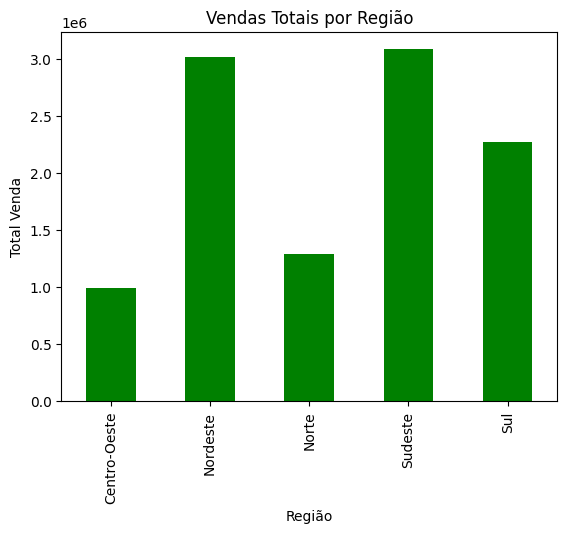

In [ ]:
### Agrupar vendas por Região
vendas_por_regiao = dados.groupby('Região')['Total Venda'].sum()
print(vendas_por_regiao)

### Plotar as vendas por região
vendas_por_regiao.plot(kind='bar', title='Vendas Totais por Região', color='green')
plt.ylabel('Total Venda')
plt.show()


In [ ]:
### Remover linhas com valores ausentes
dados_limpos = dados.dropna()

### Ou preencher valores ausentes com um valor específico
dados_preenchidos = dados.fillna({'Cor': 'Indefinido', 'Tamanho': 'Não Informado'})


In [ ]:
import smtplib
from email.mime.multipart import MIMEMultipart
from email.mime.text import MIMEText
import pandas as pd

### Função para enviar e-mail
def enviar_email(df, remetente, senha, destinatario):
    # Configurações do servidor SMTP
    servidor_smtp = 'smtp.gmail.com'
    porta_smtp = 587

    # Criar o e-mail
    mensagem = MIMEMultipart()
    mensagem['From'] = remetente
    mensagem['To'] = destinatario
    mensagem['Subject'] = 'Tabela de Vendas'

    # Converter o DataFrame em CSV e anexar ao e-mail
    df_csv = df.to_csv(index=False)
    attachment = MIMEText(df_csv, 'plain')
    attachment.add_header('Content-Disposition', 'attachment', filename='Tabela_Vendas.csv')
    mensagem.attach(attachment)

    # Conectar ao servidor SMTP e enviar o e-mail
    try:
        with smtplib.SMTP(servidor_smtp, porta_smtp) as server:
            server.starttls()
            server.login(remetente, senha)
            server.sendmail(remetente, destinatario, mensagem.as_string())
        print('E-mail enviado com sucesso!')
    except Exception as e:
        print(f'Erro ao enviar e-mail: {e}')

### Carregar os dados da tabela de vendas
file_path = 'TABELA_VENDAS.xlsx'
dados_vendas = pd.read_excel(file_path, sheet_name="Dados")

#3# Informações do remetente e destinatário
remetente = 'andersonfinanceiro17@gmail.com'
senha = 'vqcu xlix gbav csoc'  # Senha específica para aplicativos
destinatario = 'andersonfinanceiro17@gmail.com'

### Enviar o e-mail com o DataFrame
enviar_email(dados_vendas, remetente, senha, destinatario)


E-mail enviado com sucesso!


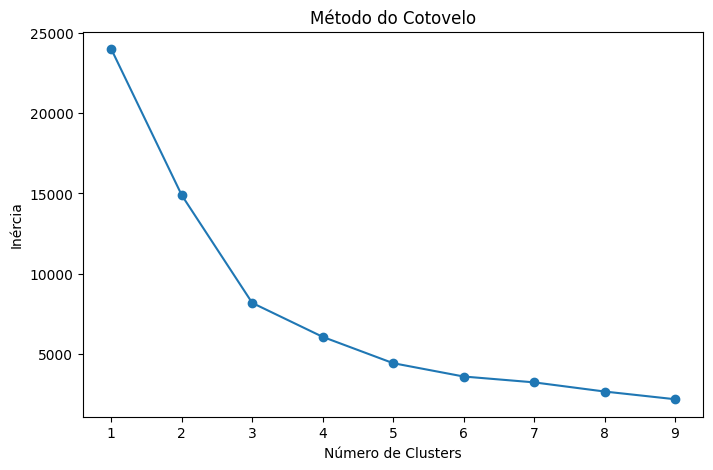

Silhouette Score: 0.65


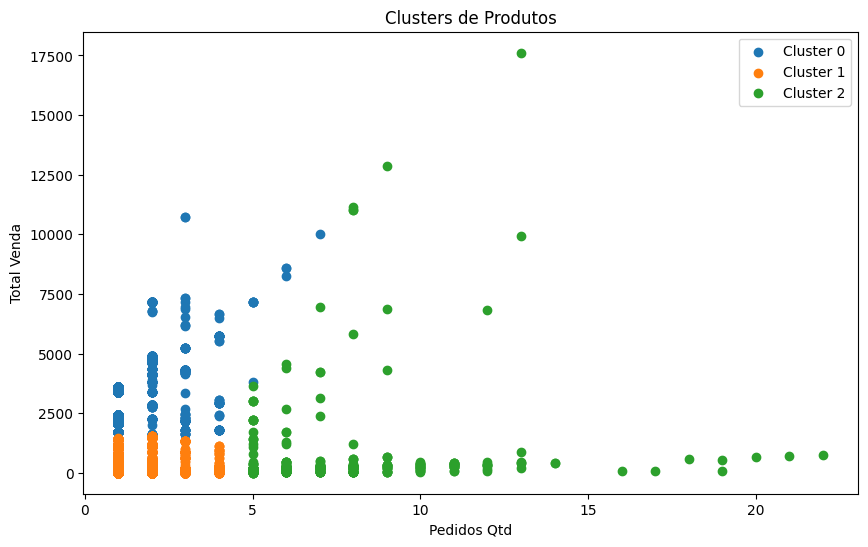

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados
file_path = 'TABELA_VENDAS.xlsx'
dados_vendas = pd.read_excel(file_path, sheet_name="Dados")

# Pré-processamento dos dados
dados_vendas = dados_vendas.dropna(subset=['Pedidos Qtd', 'Total Venda'])  # Remover valores ausentes

# Selecionar as variáveis para clustering
X = dados_vendas[['Pedidos Qtd', 'Total Venda']]

# Padronizar os dados para clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encontrar o número ideal de clusters usando o método do cotovelo
inercia = []
for k in range(1, 10):
    modelo_kmeans = KMeans(n_clusters=k, random_state=42)
    modelo_kmeans.fit(X_scaled)
    inercia.append(modelo_kmeans.inertia_)

# Plotar o método do cotovelo
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inercia, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

# Treinar o modelo com o número ideal de clusters (exemplo: 3 clusters)
n_clusters = 3
modelo_final = KMeans(n_clusters=n_clusters, random_state=42)
dados_vendas['Cluster'] = modelo_final.fit_predict(X_scaled)

# Avaliar o modelo usando a métrica silhouette
silhouette_avg = silhouette_score(X_scaled, dados_vendas['Cluster'])
print(f"Silhouette Score: {silhouette_avg:.2f}")

# Visualizar os clusters
plt.figure(figsize=(10, 6))
for cluster in range(n_clusters):
    cluster_data = dados_vendas[dados_vendas['Cluster'] == cluster]
    plt.scatter(
        cluster_data['Pedidos Qtd'],
        cluster_data['Total Venda'],
        label=f'Cluster {cluster}'
    )

plt.title('Clusters de Produtos')
plt.xlabel('Pedidos Qtd')
plt.ylabel('Total Venda')
plt.legend()
plt.show()
